Based on https://pareekshithkatti.medium.com/predicting-car-prices-using-multivariate-linear-regression-fcd54050c613

In [15]:
# Libraries
import numpy as np
import pandas as pd
from datetime import datetime as dt
from scipy import stats
import statsmodels.formula.api as sm_formula
import statsmodels.api as sm
from scipy import stats
import scipy
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
cardata=pd.read_csv('data/CarPrice_Assignment.csv')

In [3]:
cardata.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
cardata.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [5]:
# Check for null values
cardata.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [6]:
# Descriptive statistics
cardata.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Now, we shall do some processing of our data.

1) We only want the company name. So lets split the CarName and extract only company name. We will rename it to Company to avoid confusion.

2) We will calculate total miles per gallon and remove citympg and highwaympg

3) We do not require ID as well so lets remove that as well.

4) We will change the datatype of symboling to string since its a categorical variable and should not be confused to be continuous.

In [8]:
cardata['CarName']=cardata['CarName'].apply(lambda name: name.split()[0])
cardata.rename(index=str,columns={'CarName':'Company'},inplace=True)
cardata['total_mpg']=(55*cardata['citympg']/100)+(45*cardata['highwaympg']/100)
cardata.drop(['car_ID','citympg','highwaympg'],axis=1,inplace=True)
cardata.symboling=cardata.symboling.astype(str)
cardata.head()

,symboling,Company,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price,total_mpg
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,13495.0,23.70
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,16500.0,23.70
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,six,152,mpfi,2.68,3.47,9.0,154,5000,16500.0,22.15
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,four,109,mpfi,3.19,3.40,10.0,102,5500,13950.0,26.70
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,five,136,mpfi,3.19,3.40,8.0,115,5500,17450.0,19.80


In [9]:
# Companies present on our data
cardata.Company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [10]:
# Fix some names
cardata.Company.replace('maxda','mazda',inplace=True)
cardata.Company.replace('Nissan','nissan',inplace=True)
cardata.Company.replace('porcshce','porsche',inplace=True)
cardata.Company.replace('toyouta','toyota',inplace=True)
cardata.Company.replace('vokswagen','volkswagen',inplace=True)
cardata.Company.replace('vw','volkswagen',inplace=True)

In [11]:
cardata.Company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

### Data inspection

(array([83., 45., 35., 18.,  6.,  3.,  5.,  7.,  2.,  1.]),
 array([ 5118. ,  9146.2, 13174.4, 17202.6, 21230.8, 25259. , 29287.2,
        33315.4, 37343.6, 41371.8, 45400. ]),
 [<matplotlib.patches.Polygon at 0x7fd85cf62650>])

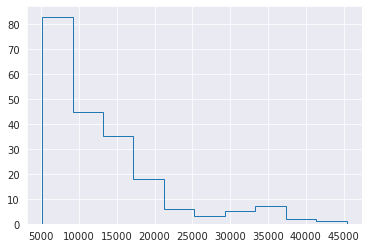

In [16]:
sns.set_style('darkgrid')
plt.hist(cardata['price'],histtype='step')

/home/miquel/anaconda3/envs/bpenv37/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

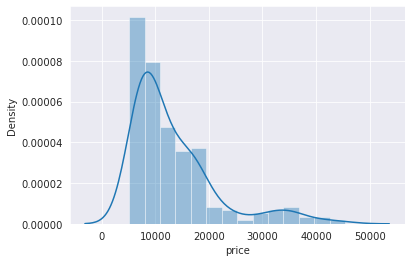

In [17]:
# Distribution of prices
sns.distplot(cardata.price)

In [18]:
print('Mean:',cardata.price.mean())
print('Median:',cardata.price.median())
print('Standard Deviation:',cardata.price.std())
print('Variance:',cardata.price.var())

Mean: 13276.710570731706
Median: 10295.0
Standard Deviation: 7988.85233174315
Variance: 63821761.57839796


<AxesSubplot:ylabel='price'>

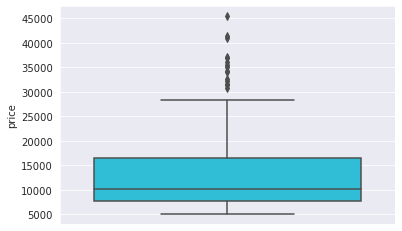

In [19]:
# Boxplot of prices
sns.boxplot(y=cardata.price,color='#13d2f2')

In [28]:
# Drop columns with high correlation
cols_to_drop=cardata.corr()[(cardata.corr()['price']<=0.5) & (cardata.corr()['price']>=-0.5)]
cols_to_drop=cols_to_drop.reset_index()['index']
cols_to_drop=list(cols_to_drop)
cardata.drop(cols_to_drop,axis=1,inplace=True)

<AxesSubplot:>

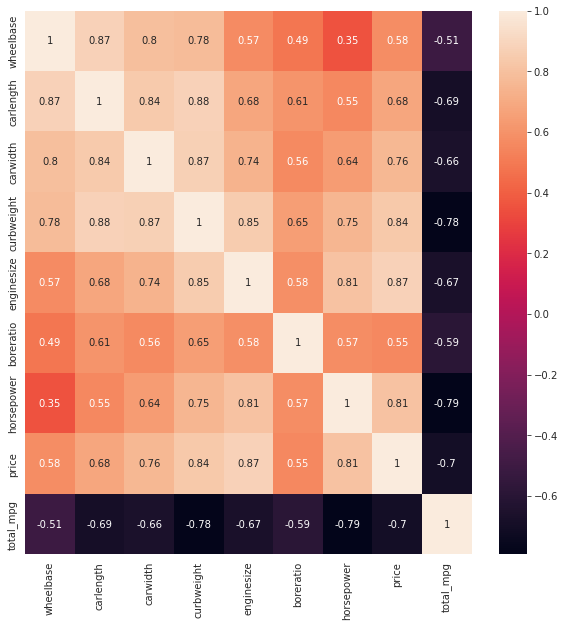

In [30]:
# Correlations of remaining variables
plt.figure(figsize=[10,10])
sns.heatmap(cardata.corr(),annot=True)

### Multiple linear model

In [32]:
predictors=cardata.drop('price',axis=1)
target=cardata.price
predictors1=predictors['enginesize']
import statsmodels.api as sm
predictors1= sm.add_constant(predictors1)
lm_1 = sm.OLS(target,predictors1).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     657.6
Date:                Fri, 12 Nov 2021   Prob (F-statistic):           1.35e-65
Time:                        09:15:13   Log-Likelihood:                -1984.4
No. Observations:                 205   AIC:                             3973.
Df Residuals:                     203   BIC:                             3979.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8005.4455    873.221     -9.168      0.0

In [46]:
predictors2=predictors[['enginesize','carwidth']]
import statsmodels.api as sm
predictors2= sm.add_constant(predictors2)
lm_2 = sm.OLS(target,predictors2).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     388.5
Date:                Fri, 12 Nov 2021   Prob (F-statistic):           5.92e-70
Time:                        09:19:22   Log-Likelihood:                -1970.7
No. Observations:                 205   AIC:                             3947.
Df Residuals:                     202   BIC:                             3957.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.572e+04   1.08e+04     -6.105      0.0

/home/miquel/anaconda3/envs/bpenv37/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### Visualization

Text(0, 0.5, 'Car Price')

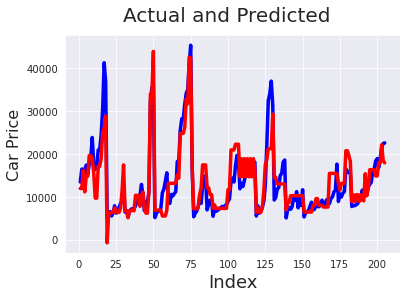

In [52]:
pred=lm_2.predict(predictors2)# Actual vs Predicted
c = [i for i in range(1,206,1)]
fig = plt.figure()
plt.plot(c,target, color="blue", linewidth=3.5, linestyle="-")     #Plotting Actual
plt.plot(c,pred, color="red",  linewidth=3.5, linestyle="-")  #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Car Price', fontsize=16)